(b) Find the posterior mode of $\theta$ by iteratively solving the equation determined by setting
the derivative of the log-likelihood to zero.

In [1]:
y <- c(-2,-1,0,1.5,2.5)

theta0 <- mean(y)

threshold <- 1e-6

repeat{
    f <- sum(2*(y-theta0)/(1+(theta0-y)^2))
    Df <- sum(2*((theta0-y)^2-1)/(1+(theta0-y)^2)^2)
    theta <- theta0 - f/Df
    epsilon <- abs(theta0-theta)
    theta0 <- theta
    if(epsilon<threshold) break
}

print(theta0)

[1] -0.1376493


(c) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] 0.7273309

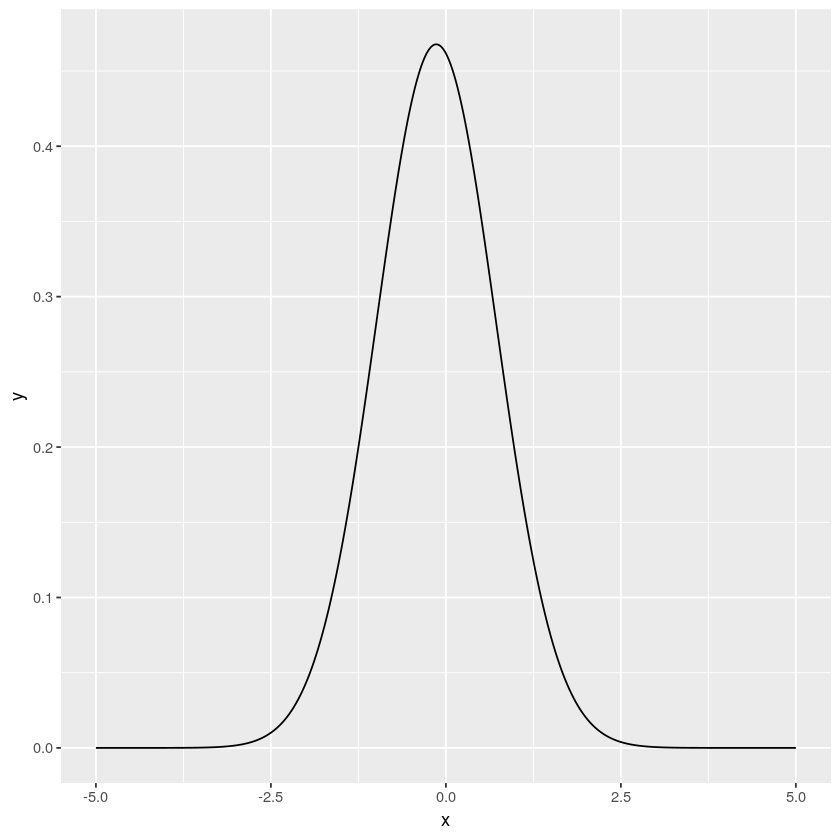

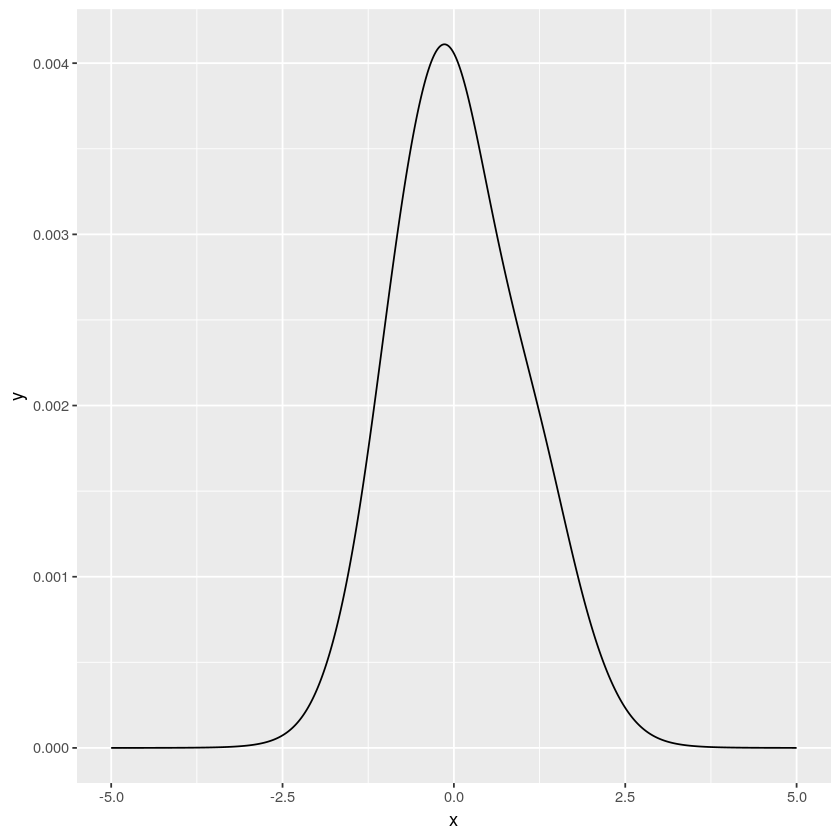

In [2]:
library(tidyverse)
Df <- sum(2*((theta0-y)^2-1)/(1+(theta0-y)^2)^2)

(-1/Df)

theta2 = seq(-5,5,length.out = 500)
postf.approx <- dnorm(theta2,theta0,sqrt(-1/Df))
df1 <- data.frame(x =theta2, y = postf.approx, type = rep("norm",length(theta2)))
ggplot(df1,aes(x,y))+
    geom_line()
m <- 100
theta2 = seq(-5,5,by=1/m)
postf <- rep(0,length(theta2))
for(i in 1:length(postf)){
    postf[i] <- sum(log(1/(1+(y-theta2[i])^2)))
}
postf = exp(postf - log(sum(exp(postf-max(postf)))) - max(postf))
df2 <- data.frame(x =theta2, y = postf, type = rep("exact",length(theta2)))
ggplot(df2,aes(x,y))+
    geom_line()